In [1]:
import pandas as pd


In [3]:
dataset = pd.read_csv("C:/Users/Admin/Downloads/train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"Number of instances in the dataset: {dataset.shape[0]}")

Number of instances in the dataset: 891


In [5]:
dataset.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True, errors='ignore')

## Temporarily, we will exclude the attributes 'Survived' and 'Pclass' from our analysis as they are classified as categorical variables.

dataset.drop(columns=['Survived', 'Pclass'], axis=1).describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [6]:
## Temporarily, we will exclude the attributes 'Age', 'SibSp', 'Parch', and 'Fare' from our analysis as they are classified as numerical variables.

for item in dataset.drop(columns=['Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1):   
    print(f"==={item.center(10)}===")
    counts_table = dataset[item].value_counts().reset_index()
    counts_table.columns = ['Value', 'Count']
    print(counts_table, end='\n\n')

=== Survived ===
   Value  Count
0      0    549
1      1    342

===  Pclass  ===
   Value  Count
0      3    491
1      1    216
2      2    184

===   Sex    ===
    Value  Count
0    male    577
1  female    314

=== Embarked ===
  Value  Count
0     S    644
1     C    168
2     Q     77



In [7]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

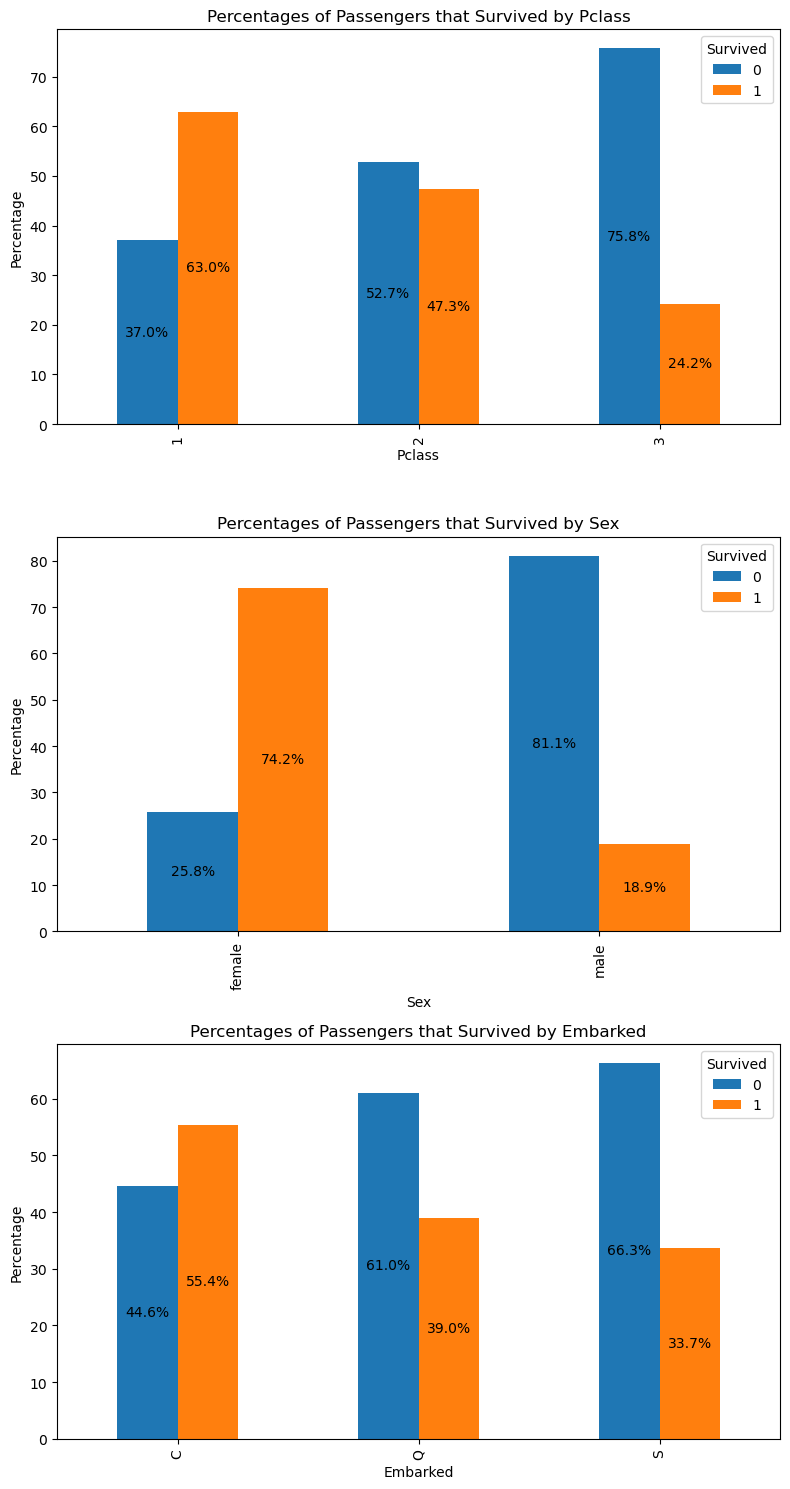

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_attributes = ['Pclass', 'Sex', 'Embarked']
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(8, len(categorical_attributes)*5))

for i, attribute in enumerate(categorical_attributes):
    ax = axes[i]
    grouped_data = dataset.groupby([attribute, 'Survived']).size().unstack()
    percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
    percentage_data.plot(kind='bar', stacked=False, ax=ax)
    ax.set_xlabel(attribute)
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentages of Passengers that Survived by {attribute}')
    ax.legend(title='Survived')
    
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.1f%%', padding=0.4)

plt.tight_layout()
plt.show()

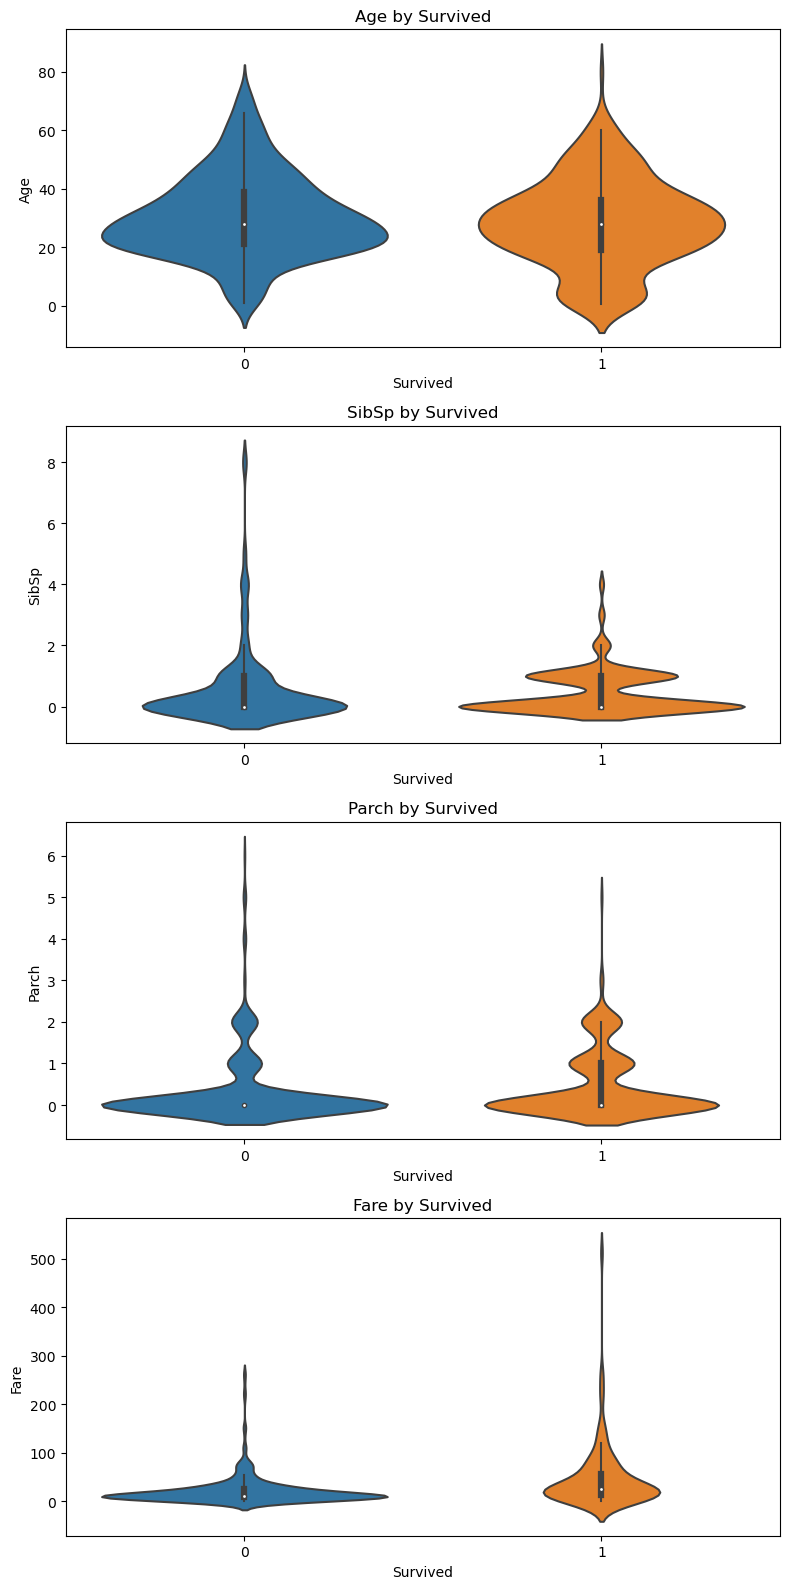

In [9]:
numeric_attributes = ['Age', 'SibSp', 'Parch', 'Fare']
fig, axes = plt.subplots(nrows=len(numeric_attributes), figsize=(8, len(numeric_attributes)*4))

for i, attribute in enumerate(numeric_attributes):
    ax = axes[i]
    sns.violinplot(data=dataset, x='Survived', y=attribute, ax=ax)
    ax.set_xlabel('Survived')
    ax.set_ylabel(attribute)
    ax.set_title(f'{attribute} by Survived')

plt.tight_layout()
plt.show()

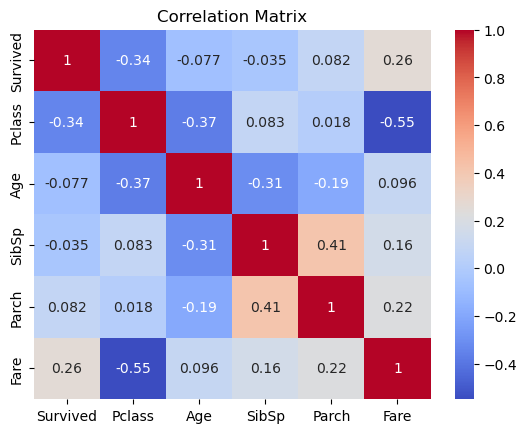

In [10]:
# Correlation Matrix 
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Data Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

trainData = pd.read_csv("C:/Users/Admin/Downloads/train.csv")
testData = pd.read_csv("C:/Users/Admin/Downloads/test.csv")

def getPredictorData(db):
    ## Deep copy of the dataset
    dataset = db.copy()
    ## Drop unused columns
    dataset.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True, errors='ignore') 
    
    ## Categorical Values
    ## Categorize the 'Cabin' attribute
    dataset['Cabin'] = dataset['Cabin'].notnull().astype(int)
    ## Categorize the 'Sex' attibute
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
    ## Delete the null 'Embarked' values, then do the one-hot encoding and annex it to the dataset
    dataset.dropna(subset=['Embarked'], inplace=True)
    one_hot_encoded = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
    dataset = pd.concat([dataset, one_hot_encoded], axis=1)
    dataset.drop('Embarked', axis=1, inplace=True)

    ## Numerical Values
    ## 'Age' Posterior imputation
    imputer = KNNImputer(n_neighbors=5)
    dataset['Age'] = imputer.fit_transform(dataset[['Age']])
    dataset['Age'] = dataset['Age'].astype(int)
    ## MinMax Scaler in 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare' attributes
    columns_to_normalize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    subset = dataset[columns_to_normalize]
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(subset)
    normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)
    dataset[columns_to_normalize] = normalized_df
    
    ## Droping any left value
    dataset.dropna(how='any', inplace=True)
    
    ## Copy the target from 'Survived' attribute
    target = dataset['Survived'].copy()
    ## Delete the attribute 'Survived' from the dataset
    dataset.drop(columns=['Survived'], axis=1, inplace=True, errors='ignore') 
    return dataset, target

In [13]:
# Artificial Neural Network (ANN)
from typing import List
from keras.models import Sequential
from keras.layers import Dense, Dropout

## Function to generate a model given the number of neurons per layer.
## Also, with the number of items in the list we can deduce the number of hidden layers
def classification_model(neurons: List[int], numCols: int):
    model = Sequential()
    ## We iterate over each layer we want to create and create it
    for index, numNeurons in enumerate(neurons):
      ## If the layer is the first one, we define the number of input neurons
      if index == 0:
        model.add(Dense(numNeurons, activation='relu', input_shape=(numCols,)))
      else:
        model.add(Dense(numNeurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Define a function to train a model
def ANNTraining(neurons: List[int], numCols: int, predictors, target, epochs):
    ## We create a NN with 'len(neurons)'' hidden layers and the 'neurons' list provides the number of neurons in each layer
    ann = classification_model(neurons, numCols)
    ## Fit the model with de train data, and verbose = 0 to avoid displaying the default prints
    ann.fit(predictors, target, epochs=epochs, verbose=0)
    return ann

In [14]:
# Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression

def LRTraining(predictors, target):
    ## Create Logistic Regression model with liblinear solver
    lr = LogisticRegression(solver='liblinear')
    lr.fit(predictors, target)
    return lr

In [15]:
# Support Vector Machine (SVM) 
from sklearn import svm

def SVMTraining(predictors, target):
    ## Create SVM model with 'rbf' kernel
    clf = svm.SVC(kernel='rbf')
    clf.fit(predictors, target) 
    return clf

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

def executeModel(model, predictors, target, iterations):
    accuracy, f1, jaccard = 0, 0 ,0
    for index in range(iterations):
        ## Divide the dataset
        X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)
        
        ## Artificial Neural Networks
        if model == 'ANN':
            annModel = ANNTraining([5, 10, 10, 10, 5], len(predictors.columns), X_train, y_train, 200)
            ## Predict the values for X_test 
            predictions = annModel.predict(X_test, verbose=0)
            predictions = [1 if value > 0.4 else 0 for value in predictions]  
            ## Aggregate metrics
            accuracy += accuracy_score(y_test, predictions)
            f1 += f1_score(y_test, predictions)
            jaccard += jaccard_score(y_test, predictions)
            
        ## Logistic Regression
        elif model == 'LR':
            lrModel = LRTraining(X_train, y_train)
            ## Predict the values for X_test 
            predictions = lrModel.predict(X_test)
            ## Aggregate metrics
            accuracy += accuracy_score(y_test, predictions)
            f1 += f1_score(y_test, predictions)
            jaccard += jaccard_score(y_test, predictions)
                
        ## Support Vector Machine
        elif model == 'SVM':
            svmModel = SVMTraining(X_train, y_train)
            ## Predict the values for X_test 
            predictions = svmModel.predict(X_test)
            ## Aggregate metrics
            accuracy += accuracy_score(y_test, predictions)
            f1 += f1_score(y_test, predictions)
            jaccard += jaccard_score(y_test, predictions)
            
    return [model, (accuracy/iterations), (f1/iterations), (jaccard/iterations)]

In [17]:
import time

models = ['ANN', 'LR', 'SVM']
data = []

for index, value in enumerate(models):
    start_time = time.time()
    predictors, target = getPredictorData(trainData)
    result = executeModel(value, predictors, target, 3)
    end_time = time.time()
    formatted_runtime = "{:.3f}".format(end_time - start_time)
    result = result + [formatted_runtime]
    data.append(result)
    
comparison = pd.DataFrame(data, columns=['Model', 'Accuracy', 'F1', 'Jaccard', 'Runtime'])
print(comparison)

  Model  Accuracy        F1   Jaccard Runtime
0   ANN  0.762172  0.705449  0.545483  40.208
1    LR  0.779026  0.704998  0.545370   0.096
2   SVM  0.769663  0.686825  0.523125   0.231


In [18]:
## Data treatment to the Test dataset

dataset = testData.copy()
dataset.drop(columns=['Name', 'Ticket'], axis=1, inplace=True, errors='ignore') 
dataset['Cabin'] = dataset['Cabin'].notnull().astype(int)
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
one_hot_encoded = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
dataset = pd.concat([dataset, one_hot_encoded], axis=1)
dataset.drop('Embarked', axis=1, inplace=True)
imputer = KNNImputer(n_neighbors=5)
dataset['Age'] = imputer.fit_transform(dataset[['Age']])
dataset['Age'] = dataset['Age'].astype(int)
imputer = KNNImputer(n_neighbors=5)
dataset['Fare'] = imputer.fit_transform(dataset[['Fare']])
dataset['Fare'] = dataset['Fare'].astype(int)
columns_to_normalize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
subset = dataset[columns_to_normalize]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(subset)
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)
dataset[columns_to_normalize] = normalized_df
ids = dataset['PassengerId'].copy()
dataset.drop('PassengerId', axis=1, inplace=True)

testX = dataset.copy()

In [19]:
## Training dataset
predictors, target = getPredictorData(trainData)

##  ==== ANN Model ====
# annModel = ANNTraining([5, 10, 10, 10, 5], len(predictors.columns), predictors, target, 200)
# predictions = annModel.predict(dataset, verbose=0)
# predictions = [1 if value > 0.4 else 0 for value in predictions]

## ==== LR Model ====
lrModel = LRTraining(predictors, target)
predictions = lrModel.predict(testX)

## ==== SVM Model ====
# svmModel = SVMTraining(predictors, target)
# predictions = svmModel.predict(dataset)

# Fusion the IDs with predictions, and then, generate a csv with that information
result = list(zip(ids, predictions))
result = pd.DataFrame(result, columns=['PassengerId', 'Survived'])
result.to_csv('submission.csv', index=False)

In [20]:
from statistics import mode

iterations = 3
accuracy, f1, jaccard = 0, 0, 0
start_time = time.time()
for i in range(iterations):
    predictors, target = getPredictorData(trainData)   
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)

    ##  ==== ANN Model ====
    annModel = ANNTraining([5, 10, 10, 10, 5], len(predictors.columns), X_train, y_train, 200)
    predictionsANN = annModel.predict(X_test, verbose=0)
    predictionsANN = [1 if value > 0.4 else 0 for value in predictions]

    ## ==== LR Model ====
    lrModel = LRTraining(X_train, y_train)
    predictionsLR = lrModel.predict(X_test)

    ## ==== SVM Model ====
    svmModel = SVMTraining(X_train, y_train)
    predictionsSVM = svmModel.predict(X_test)
    
    ## Join all the predictions
    result = []
    for a, b, c in zip(predictionsANN, predictionsLR, predictionsSVM):
        values = [a, b, c]
        result.append(mode(values))

    accuracy += accuracy_score(y_test, result)
    f1 += f1_score(y_test, result)
    jaccard += jaccard_score(y_test, result)

end_time = time.time()
newInstance = ['Joined Model', (accuracy/iterations), (f1/iterations), (jaccard/iterations), "{:.3f}".format(end_time - start_time)]
comparison.loc[len(comparison)] = newInstance
print(comparison)

          Model  Accuracy        F1   Jaccard Runtime
0           ANN  0.762172  0.705449  0.545483  40.208
1            LR  0.779026  0.704998  0.545370   0.096
2           SVM  0.769663  0.686825  0.523125   0.231
3  Joined Model  0.747191  0.636810  0.467831  40.022


In [24]:
print(result)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
